In [12]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Load the Dataset
file_path = r"C:\Users\Sowjanniya\OneDrive\Desktop\uber-Sowjanya.csv"

df = pd.read_csv(file_path)

#Display the first few rows of the dataset
print(df.head())

#Summary Statistics
print(df.describe())

#Data types and missing values
print(df.info())




   Unnamed: 0      key  fare_amount          pickup_datetime  \
0    24238194  52:06.0          7.5  2015-05-07 19:52:06 UTC   
1    27835199  04:56.0          7.7  2009-07-17 20:04:56 UTC   
2    44984355  45:00.0         12.9  2009-08-24 21:45:00 UTC   
3    25894730  22:21.0          5.3  2009-06-26 08:22:21 UTC   
4    17610152  47:00.0         16.0  2014-08-28 17:47:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  
0                1  
1                1  
2                1  
3                3  
4                5  
         Unnamed: 0    far

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None

Missing Values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

First few rows:
    Unname

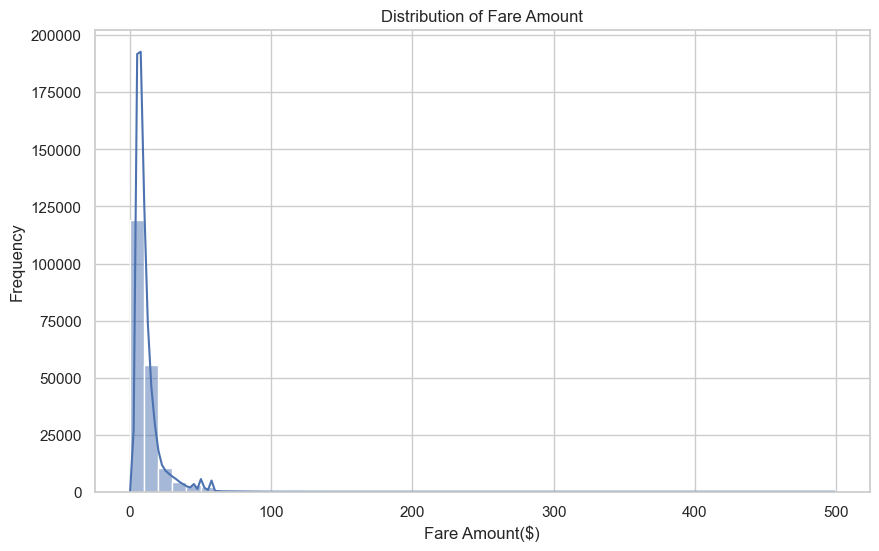

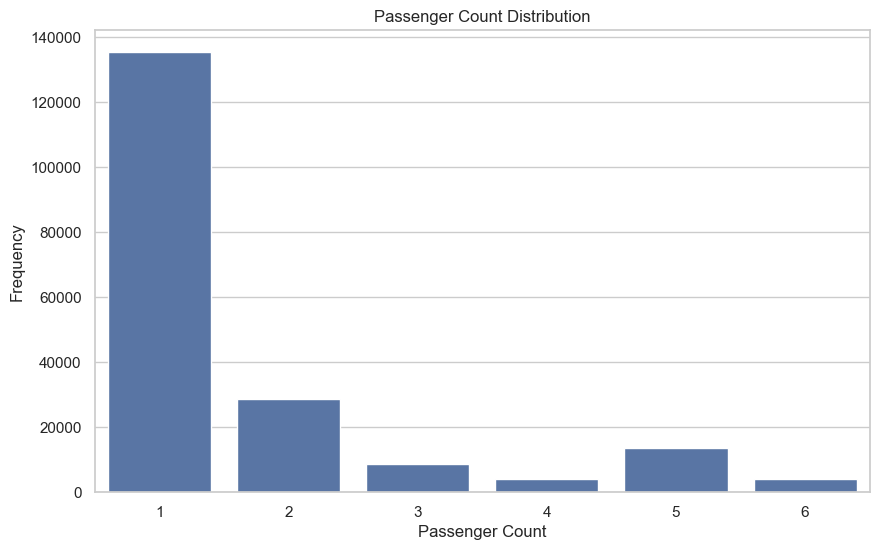

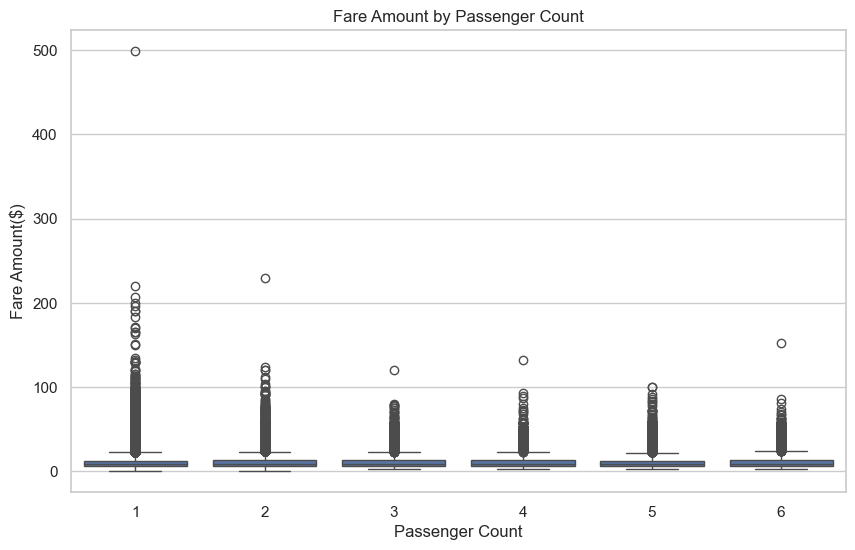

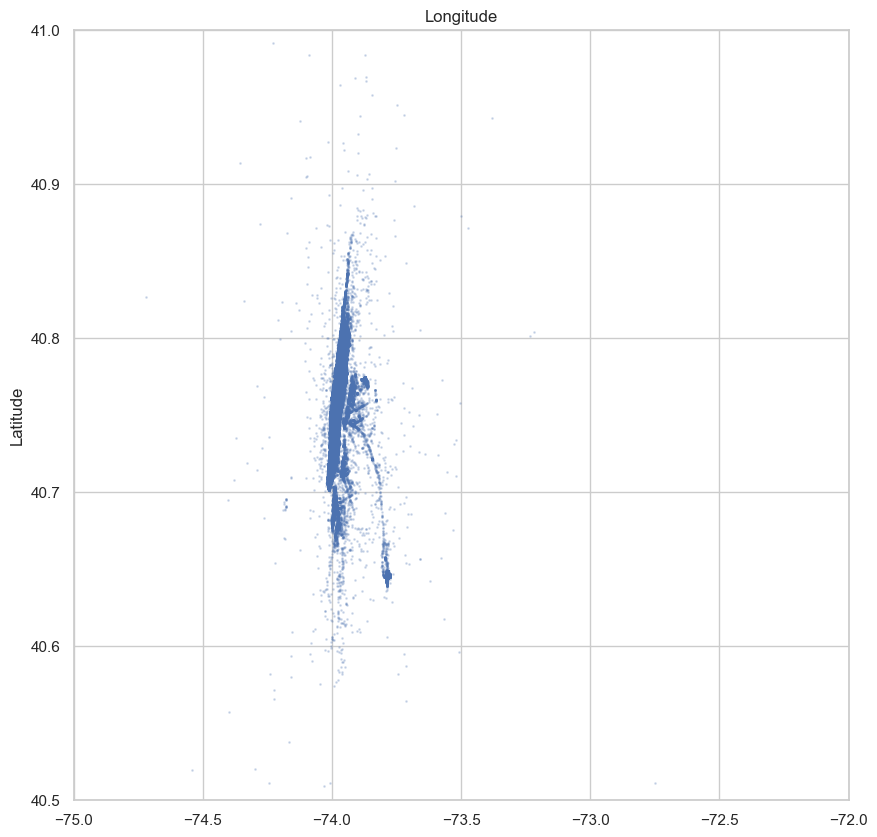

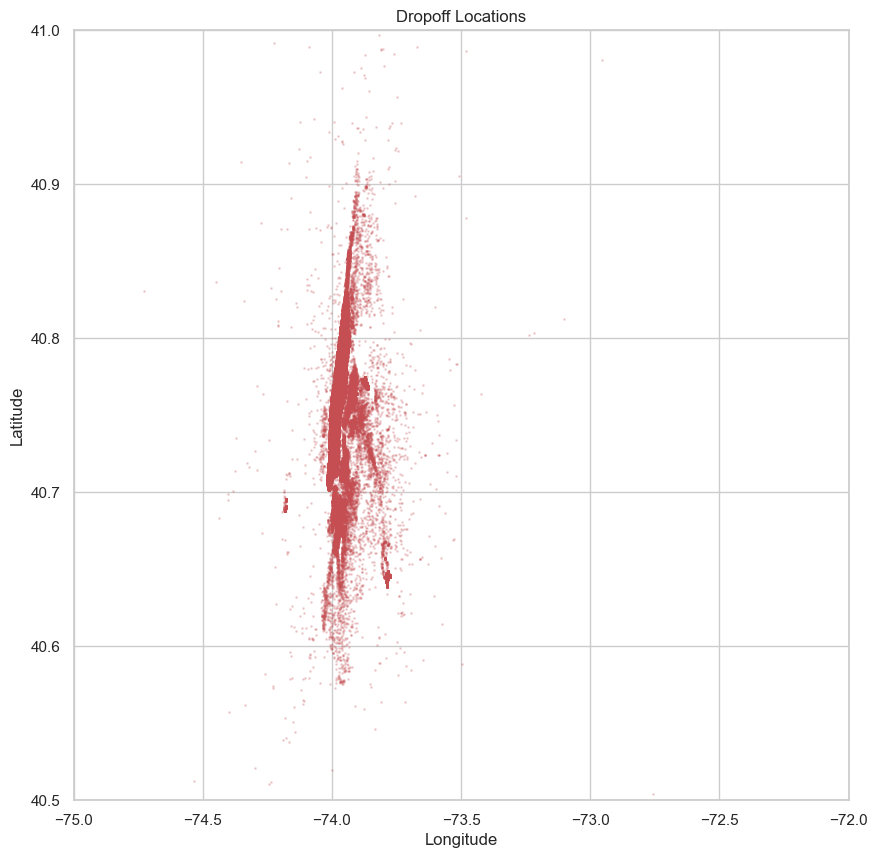

C:\Users\Sowjanniya\AppData\Local\Temp\ipykernel_28004\2960354388.py:85: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('pickup_datetime')['fare_amount'].resample('M').mean().plot()


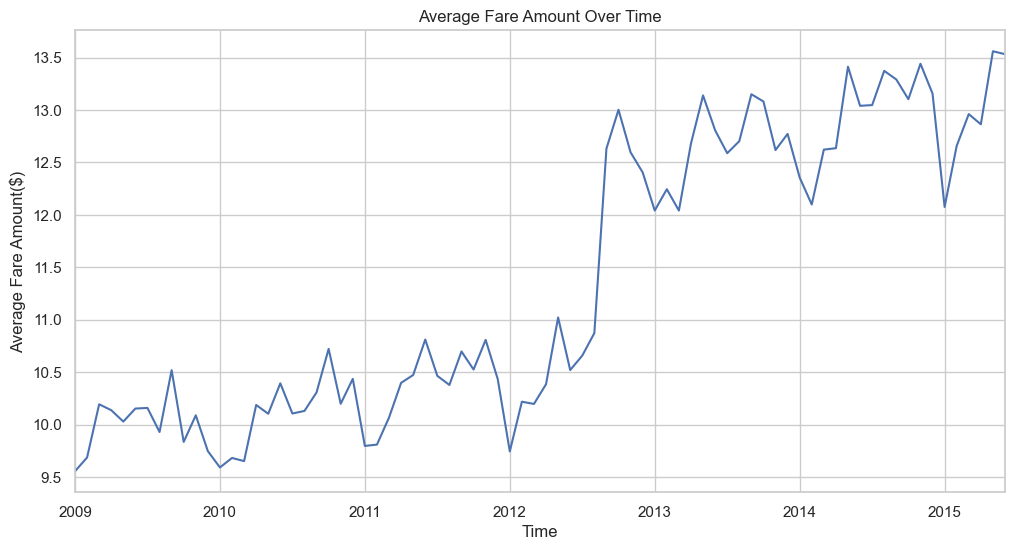

In [11]:
#EXPLORATORY DATA ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
file_path = r'C:\Users\Sowjanniya\OneDrive\Desktop\uber-sowjanya.csv'
data = pd.read_csv(file_path)

#Intial Data inspection 
print("Data Information:")
print(data.info())
print("\nMissing Values:\n" , data.isnull().sum())
print("\nFirst few rows:\n", data.head())

#Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])
#Drop index column if present

#Convert pickup_datetime to datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors='coerce')

#Handle missing values by dropping or fillling
data = data.dropna()

#Descriptive Statistics
print("\nDescriptive Statistics:\n", data.describe())

#Filtering out extreme or unrealistic values
data = data[(data['fare_amount']>=0)&(data['fare_amount']<=500)&(data['pickup_latitude'].between(40.5,41))&(data['pickup_longitude'].between(-75,-72))&
(data['dropoff_latitude'].between(40.5,41))&(data['dropoff_longitude'].between(-75,-72))&(data['passenger_count'].between(1,6))]


#Visualization Setup
sns.set(style="whitegrid")

#1.Distribution of fare_amount
plt.figure(figsize=(10,6))
sns.histplot(data['fare_amount'],bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount($)")
plt.ylabel("Frequency")
plt.show()

#2.Distribution of Passenger_Count
plt.figure(figsize=(10,6))
sns.countplot(x='passenger_count', data=data)
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.show()

#3.Relationship between fare amount and passenger count
plt.figure(figsize=(10,6))
sns.boxplot(x='passenger_count',y='fare_amount', data=data)
plt.title("Fare Amount by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount($)")
plt.show()

#4.Pickup locations(longitude and Latitude)
plt.figure(figsize=(10,10))
plt.scatter(data['pickup_longitude'], data['pickup_latitude'], alpha=0.2,s=1)
plt.xlim([-75,-72])
plt.ylim([40.5,41])
plt.title("Pickup Locations")
plt.title("Longitude")
plt.ylabel("Latitude")
plt.show()

#5.Dropoff locations (longitude and Latitude)
plt.figure(figsize=(10,10))
plt.scatter(data['dropoff_longitude'], data['dropoff_latitude'], alpha=0.2, s=1,color='r')
plt.xlim([-75,-72])
plt.ylim([40.5,41])
plt.title("Dropoff Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

#6.Fare Amount over time
plt.figure(figsize=(12,6))
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.set_index('pickup_datetime')['fare_amount'].resample('M').mean().plot()
plt.title("Average Fare Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Average Fare Amount($)")
plt.show()
                                        


In [1]:

!pip install geopy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r'C:\Users\Sowjanniya\OneDrive\Desktop\uber-Sowjanya.csv'
df = pd.read_csv(file_path)

#Drop the rows with missing values
df_cleaned = df.dropna().reset_index(drop = True)

#Convert pickup.date time to date time format and extract useful time features.
df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])
df_cleaned['hour'] = df_cleaned['pickup_datetime'].dt.hour
df_cleaned['day_of_week'] = df_cleaned['pickup_datetime'].dt.dayofweek
df_cleaned['month'] = df_cleaned['pickup_datetime'].dt.month

#Calculate the distance between pickup and drop off points using geospatial coordinates.

from geopy.distance import geodesic
def Calculate_distance(row):
    return geodesic ((row['pickup_latitude'] , row['pickup_longitude']) , (row['dropoff_latitude']) , (row['dropoff_longitude'])).Kilometers
df_cleaned['distance_km'] = df_cleaned.apply(Calculate_distance , axis = 0)


#split the data
from sklearn .model_selection import train_test_split
x = df_cleaned.drop(columns = ['fare amount','key','pickup_datetime'])
y = df_cleaned['fare_amount']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 42)

                                                                          


KeyError: 'pickup_latitude'

In [8]:
#DATA SCALING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Load the dataset
file_path = r'C:\Users\Sowjanniya\OneDrive\Desktop\uber-sowjanya.csv'
df = pd.read_csv(file_path)

#Drop rows with missing values
df_clean = df.dropna()

#Select features and target variable
features = ['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
target = 'fare_amount'

X = df_clean[features]
y = df_clean[target]

#Split in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Standard Scaling (Z- score normalization)
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_train_standard = standard_scaler.transform(X_test)

#Min-Max Scaling (Normalization to [0,1])
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

#Train and evaluate a regressio model on standardized data
reg_standard = LinearRegression()
reg_standard.fit(X_train_standard, y_train)
y_pred_standard = reg_standard.predict(X_test_standard)
mse_standard = mean_squared_error(y_test, y_pred_standard)
print("Mean Squared Error(Standard Scaling):", mse_standard)

#Train and Evaluate a Regression Model on min-max normalized data
reg_minmax = LinearRegression()
reg_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = reg_minmax.predict(X_test_minmax)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
print("Mean Squared error(Min-Max Scaling):", mse_minmax)







ValueError: Found input variables with inconsistent numbers of samples: [40000, 159999]

In [11]:
#To calculate the Correlation Matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Load the dataset
file_path = r'C:\Users\Sowjanniya\OneDrive\Desktop\uber-sowjanya.csv'
df = pd.read_csv(file_path)

#Drop rows with missing values for simplicity
df_clean = df.dropna()

#Select relevant numerical features for scaling
features_to_scale = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

#Intialize the scaler and scale the data
scaler = StandardScaler()
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

#Calculate the Correlation matrix
correlation_matrix = df_clean[features_to_scale].corr()

#Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.010458        -0.008482   
pickup_longitude      0.010458          1.000000        -0.816461   
pickup_latitude      -0.008482         -0.816461         1.000000   
dropoff_longitude     0.008986          0.833026        -0.774787   
dropoff_latitude     -0.011014         -0.846324         0.702367   
passenger_count       0.010158         -0.000415        -0.001559   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                 0.008986         -0.011014         0.010158  
pickup_longitude            0.833026         -0.846324        -0.000415  
pickup_latitude            -0.774787          0.702367        -0.001559  
dropoff_longitude           1.000000         -0.917010         0.000033  
dropoff_latitude           -0.917010          1.000000        -0.000659  
passenger_count             0.000033         -0.0006

C:\Users\Sowjanniya\AppData\Local\Temp\ipykernel_20544\756978434.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])
